In [1]:
import sys
import os

# 获取当前 notebook 的目录
current_dir = os.getcwd()

# 获取项目根目录 (假设 notebook 在 notebooks/ 下，根目录就是上一级)
# 如果你的 notebook 在 notebooks/experiment_1/ 这种二级目录下，可能需要 ".." 两次
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# 将根目录加入 python 路径
if project_root not in sys.path:
    sys.path.append(project_root)

# 一、数据清洗

## (一)导入合并数据并检查

In [2]:
from src.data import load_and_check

In [3]:
df_raw = load_and_check.load_raw_data()

共发现 2 个 JSON 文件，准备开始加载...
[1/2] 正在读取: 条件1_articles.json
[2/2] 正在读取: 条件2_articles.json
合并完成，共 281 条新闻。


In [4]:
load_and_check.check_data(df_raw)

数据总行数: 281
完美！没有发现缺失值。


,Total,Percent (%),Type


## (二)基础清洗

In [5]:
from src.data import data_clean

In [6]:
df_after_basic_clean = data_clean.basic_clean(df_raw)

--------------------------------------------------
正在规范化时间格式
转换前的pub_time示例: 2025/12/08
转换后的publish_date示例: 2025-12-08 00:00:00
正在删除不需要数据列
剩余列名如下: ['id', 'headline', 'source', 'content', 'publish_date']
正在重命名列
重命名后列名如下: ['id', 'title', 'source_media', 'content', 'publish_date']
正在去除重复数据，去除前数据量为: 281
共去除重复数据: 8 去除后数据量为: 273
--------------------------------------------------


## (三)处理媒体来源

In [7]:
df_after_media_clean = data_clean.meida_clean(df_after_basic_clean)

--------------------------------------------------
【开始媒体清洗流程】
原始数据总量: 273 条
原始媒体分布已保存至: tables/源数据媒体来源分布.csv

--- 正在执行黑名单过滤 ---
黑名单关键词: ['The Tribune-Democrat']
黑名单清洗后剩余: 273 条 (共移除 0 条)

--- 正在进行媒体来源合并与标准化 ---
合并后媒体分布已保存至: tables/清洗后媒体来源分布.csv
--------------------------------------------------


In [8]:
from src.visualization import media_visualization

完成可视化设置，当前系统: Linux，字体配置优先顺序: Noto Serif CJK SC
正在生成合并筛选后媒体来源分布图


/home/terrariver/projects/Public-Opinion-Monitoring/src/visualization/media_visualization.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


媒体来源分布图已保存至: /home/terrariver/projects/Public-Opinion-Monitoring/results/figures/媒体来源分布图.png
--------------------------------------------------


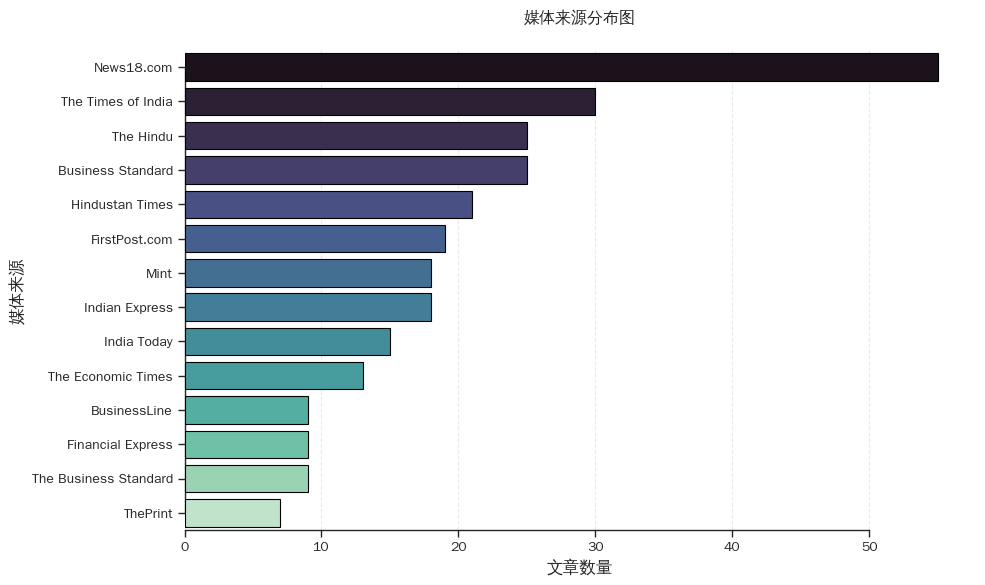

In [9]:
media_visualization.media_visualization(df_after_media_clean)

## (四)数据存储

In [10]:
data_clean.data_save(df_after_media_clean)

清洗完成后数据总条数为273
正在保存最终清洗数据到: /home/terrariver/projects/Public-Opinion-Monitoring/data/processed
数据保存完成。


# 二、大模型解析

## (一)利用大模型进行分类

In [11]:
# 加载清洗后的数据
df_clean = load_and_check.load_clean_data()

In [12]:
from src.llm import llm_classify

In [13]:
llm_classify.llm_classify_concurrently(df_clean)

📊 总行数: 273
🔄 本次需处理: 273 行
✅ 已完成: 0 行

⚙️ 并发配置:
  - 线程数: 10
  - 每条重试: 5 次
  - 自动保存间隔: 每 15 条

🚀 开始并发处理...



🔥 LLM Processing:   0%|          | 0/273 [00:00<?, ?it/s]

🔥 LLM Processing:   5%|▌         | 15/273 [00:54<08:13,  1.91s/it]


💾 已保存进度: 15/273 (0.28 条/秒)


🔥 LLM Processing:  11%|█         | 30/273 [01:26<07:29,  1.85s/it]


💾 已保存进度: 30/273 (0.35 条/秒)


🔥 LLM Processing:  16%|█▋        | 45/273 [02:06<10:28,  2.76s/it]


💾 已保存进度: 45/273 (0.35 条/秒)


🔥 LLM Processing:  22%|██▏       | 60/273 [02:37<06:48,  1.92s/it]


💾 已保存进度: 60/273 (0.38 条/秒)


🔥 LLM Processing:  27%|██▋       | 75/273 [03:08<07:28,  2.27s/it]


💾 已保存进度: 75/273 (0.40 条/秒)


🔥 LLM Processing:  33%|███▎      | 90/273 [03:46<06:27,  2.12s/it]


💾 已保存进度: 90/273 (0.40 条/秒)


🔥 LLM Processing:  38%|███▊      | 105/273 [04:31<13:20,  4.77s/it]


💾 已保存进度: 105/273 (0.39 条/秒)


🔥 LLM Processing:  44%|████▍     | 121/273 [05:05<05:36,  2.21s/it]


💾 已保存进度: 120/273 (0.39 条/秒)


🔥 LLM Processing:  49%|████▉     | 134/273 [05:28<04:00,  1.73s/it]


💾 已保存进度: 135/273 (0.41 条/秒)


🔥 LLM Processing:  52%|█████▏    | 142/273 [05:42<03:44,  1.71s/it]

❌ JSON 解析失败，可能是模型输出格式错误。重试中...


🔥 LLM Processing:  55%|█████▍    | 150/273 [06:09<05:45,  2.81s/it]


💾 已保存进度: 150/273 (0.41 条/秒)


🔥 LLM Processing:  60%|██████    | 165/273 [06:34<02:29,  1.38s/it]


💾 已保存进度: 165/273 (0.42 条/秒)


🔥 LLM Processing:  66%|██████▌   | 180/273 [07:03<02:29,  1.61s/it]


💾 已保存进度: 180/273 (0.43 条/秒)


🔥 LLM Processing:  70%|██████▉   | 191/273 [07:36<05:34,  4.08s/it]


💾 已保存进度: 195/273 (0.43 条/秒)


🔥 LLM Processing:  77%|███████▋  | 210/273 [08:01<01:12,  1.14s/it]


💾 已保存进度: 210/273 (0.44 条/秒)


🔥 LLM Processing:  82%|████████▏ | 224/273 [08:52<01:44,  2.14s/it]


💾 已保存进度: 225/273 (0.43 条/秒)


🔥 LLM Processing:  88%|████████▊ | 241/273 [09:22<00:39,  1.23s/it]


💾 已保存进度: 240/273 (0.43 条/秒)


🔥 LLM Processing:  93%|█████████▎| 255/273 [09:51<00:42,  2.36s/it]


💾 已保存进度: 255/273 (0.43 条/秒)


🔥 LLM Processing:  98%|█████████▊| 268/273 [10:10<00:07,  1.57s/it]


💾 已保存进度: 270/273 (0.44 条/秒)


🔥 LLM Processing: 100%|██████████| 273/273 [10:27<00:00,  2.30s/it]


✅ 最终保存成功!

✅ 处理完成!
📈 性能统计:
  - 总耗时: 627.89 秒
  - 平均速度: 0.43 条/秒
  - 处理总数: 273 条

🎊 完美! 所有数据均已归入标准分类



,id,title,source_media,content,publish_date,category,reason
0,INTY000020251202elc800001,Meitei vs Kuki-Zo Manipur: The tragic divide,India Today,"Two years after brutal violence, the state rem...",2025-12-08,其他,文章报道印度曼尼普尔邦内部种族冲突及政府应对，属印度国内安全事务，未直接涉及中印关系。
1,BSTN000020251207elc8000y1,Phase-II of carbon control,Business Standard,"January 2026, the CBAM, is a big deal for Indi...",2025-12-08,中印经贸与科技,文章分析了欧盟碳边境调节机制（CBAM）对印度出口的影响，并特别指出相比中国出口商（因可再生...
2,BSTN000020251207elc8000y2,Fit solar into electricity,Business Standard,"Think of “roof”, and you see solar panels. Thi...",2025-12-08,其他,文章主要分析印度和巴基斯坦的屋顶太阳能并网挑战及能源政策，虽提及巴基斯坦进口中国光伏板，但核...
3,BSTN000020251207elc8000xz,Russian partnership,Business Standard,India’s assertion of strategic autonomy will b...,2025-12-08,中印双边关系,文章分析了印度在普京访印期间展现的“战略自主”外交政策，探讨了印太战略（Quad）受挫及印俄...
4,BSTN000020251207elc8000xx,Trump security plan calls for stronger India ties,Business Standard,The National Security Strategy emphasises the ...,2025-12-08,中印双边关系,文章主要讨论美国国家安全战略强调加强与印度的关系以对抗中国（包括四方安全对话和印太安全），属...
...,...,...,...,...,...,...,...
268,HNTM000020251208elc9004bl,Himachal to provide relief on loans taken for ...,Hindustan Times,"Shimla, Dec. 9 -- The state government will pr...",2025-12-09,其他,文章主要报道印度喜马偕尔邦的内部旅游贷款补贴政策及民生设施建设，虽提及边境旅游，但核心议题为...
269,AIWINE0020251209elc90000p,‘Glad the flight got cancelled’: Trains to res...,Indian Express,When IndiGo cancelled his flight from Mumbai o...,2025-12-09,其他,文章主要报道印度国内IndiGo航班取消导致旅客改乘火车及滞留机场的民生新闻，虽提及达旺和达...
270,NEWSET0020251209elc90008h,Ind Vs SA 1st T20I Weather Report And Barabati...,News18.com,"India vs South Africa 1st T20 Match Weather, P...",2025-12-09,其他,本文是一篇关于印度与南非板球比赛（T20I）的体育报道，涉及天气预报和场地分析，无地缘政治或...
271,TOIDEL0020251209elc90000s,"At City Party Hubs, Fire Safety An Afterthought",The Times of India,New Delhi: A spot check of some of the city's ...,2025-12-09,其他,文章主要报道新德里当地娱乐场所的消防安全隐患，属于印度国内社会民生新闻，无地缘政治或情报价值。


## (二)利用大模型进行总结与情感分析

In [14]:
df_after_classify = load_and_check.load_classify_data()

🧹 已自动剔除 142 条无效/错误分类数据 (剩余 131 条)


In [15]:
from src.llm import llm_summarize

In [16]:
llm_summarize.llm_summarize_concurrently(df_after_classify)

📊 总行数: 131
🔄 本次需处理: 131 行

🚀 开始并发处理 (Workers: 10)...



🔥 LLM Processing:  11%|█▏        | 15/131 [00:55<04:33,  2.35s/it]


💾 已保存: 15/131 (0.27 it/s, Err: 0)


🔥 LLM Processing:  21%|██▏       | 28/131 [01:37<08:14,  4.80s/it]


💾 已保存: 30/131 (0.31 it/s, Err: 0)


🔥 LLM Processing:  34%|███▍      | 45/131 [02:21<03:47,  2.64s/it]


💾 已保存: 45/131 (0.32 it/s, Err: 0)


🔥 LLM Processing:  46%|████▌     | 60/131 [02:53<02:44,  2.32s/it]


💾 已保存: 60/131 (0.35 it/s, Err: 0)


🔥 LLM Processing:  57%|█████▋    | 75/131 [03:42<02:15,  2.43s/it]


💾 已保存: 75/131 (0.34 it/s, Err: 0)


🔥 LLM Processing:  69%|██████▊   | 90/131 [04:33<02:17,  3.35s/it]


💾 已保存: 90/131 (0.33 it/s, Err: 0)


🔥 LLM Processing:  80%|████████  | 105/131 [05:15<01:18,  3.03s/it]


💾 已保存: 105/131 (0.33 it/s, Err: 0)


🔥 LLM Processing:  92%|█████████▏| 120/131 [06:03<00:45,  4.11s/it]


💾 已保存: 120/131 (0.33 it/s, Err: 0)


🔥 LLM Processing: 100%|██████████| 131/131 [06:56<00:00,  3.18s/it]


✅ 处理完成! 错误数: 0
